# Import Libraries

In [1]:
import stylecloud # Word cloud generator
import pandas as pd # Database operations
from IPython.display import Image # Display word cloud image
from stop_words import get_stop_words # Stop words for several languages

# Upload Data

The txt data was downloaded without media using the available option into Whatsapp app (*Export chat*)

In [2]:
text = pd.read_table("Data/whatsapp.txt", header = None)
text.columns = ["Info"]
text

,Info
0,"9/25/17, 3:23 PM - Camilo Daza: Sr, que cuenta"
1,"9/25/17, 4:14 PM - Alejandro Castellanos: Dear..."
2,"9/25/17, 4:20 PM - Camilo Daza: Too nice, for now"
3,"9/25/17, 4:20 PM - Camilo Daza: How about u?"
4,"9/25/17, 4:23 PM - Alejandro Castellanos: Doin..."
...,...
20761,"10/12/22, 12:01 PM - Alejandro Castellanos: Há..."
20762,"10/12/22, 12:01 PM - Camilo Daza: Estaría bien"
20763,3-4 diciembre?
20764,"10/12/22, 12:04 PM - Alejandro Castellanos: Si..."


## Data processing

In [3]:
# Drop the rows with line breaks 

text = text[text["Info"].str.contains("M -") ]
text

,Info
0,"9/25/17, 3:23 PM - Camilo Daza: Sr, que cuenta"
1,"9/25/17, 4:14 PM - Alejandro Castellanos: Dear..."
2,"9/25/17, 4:20 PM - Camilo Daza: Too nice, for now"
3,"9/25/17, 4:20 PM - Camilo Daza: How about u?"
4,"9/25/17, 4:23 PM - Alejandro Castellanos: Doin..."
...,...
20760,"10/12/22, 11:59 AM - Camilo Daza: Mejor cuadra..."
20761,"10/12/22, 12:01 PM - Alejandro Castellanos: Há..."
20762,"10/12/22, 12:01 PM - Camilo Daza: Estaría bien"
20764,"10/12/22, 12:04 PM - Alejandro Castellanos: Si..."


In [4]:
# Split columns

text = text['Info'].str.split(':', expand = True)
text

,0,1,2,3,4
0,"9/25/17, 3",23 PM - Camilo Daza,"Sr, que cuenta",None,None
1,"9/25/17, 4",14 PM - Alejandro Castellanos,"Dear Daza, how are you? 😁",None,None
2,"9/25/17, 4",20 PM - Camilo Daza,"Too nice, for now",None,None
3,"9/25/17, 4",20 PM - Camilo Daza,How about u?,None,None
4,"9/25/17, 4",23 PM - Alejandro Castellanos,Doing well. Destroying the inventors' dreams,None,None
...,...,...,...,...,...
20760,"10/12/22, 11",59 AM - Camilo Daza,Mejor cuadrarlo los dos 🤗,None,None
20761,"10/12/22, 12",01 PM - Alejandro Castellanos,"Hágale, ya con la experiencia que hemos tenid...",None,None
20762,"10/12/22, 12",01 PM - Camilo Daza,Estaría bien,None,None
20764,"10/12/22, 12",04 PM - Alejandro Castellanos,"Si, me parece",None,None


Column 0 has date information

Columns 3 and 4 contain URL information. 

These information is not useful for the text analysis


In [5]:
# Drop columns

text.drop([0, 3, 4], axis = 1, inplace = True)
text

,1,2
0,23 PM - Camilo Daza,"Sr, que cuenta"
1,14 PM - Alejandro Castellanos,"Dear Daza, how are you? 😁"
2,20 PM - Camilo Daza,"Too nice, for now"
3,20 PM - Camilo Daza,How about u?
4,23 PM - Alejandro Castellanos,Doing well. Destroying the inventors' dreams
...,...,...
20760,59 AM - Camilo Daza,Mejor cuadrarlo los dos 🤗
20761,01 PM - Alejandro Castellanos,"Hágale, ya con la experiencia que hemos tenid..."
20762,01 PM - Camilo Daza,Estaría bien
20764,04 PM - Alejandro Castellanos,"Si, me parece"


In [6]:
# Split user information

text[["Time","User"]] = text[1].str.split('-', expand = True)
text

,1,2,Time,User
0,23 PM - Camilo Daza,"Sr, que cuenta",23 PM,Camilo Daza
1,14 PM - Alejandro Castellanos,"Dear Daza, how are you? 😁",14 PM,Alejandro Castellanos
2,20 PM - Camilo Daza,"Too nice, for now",20 PM,Camilo Daza
3,20 PM - Camilo Daza,How about u?,20 PM,Camilo Daza
4,23 PM - Alejandro Castellanos,Doing well. Destroying the inventors' dreams,23 PM,Alejandro Castellanos
...,...,...,...,...
20760,59 AM - Camilo Daza,Mejor cuadrarlo los dos 🤗,59 AM,Camilo Daza
20761,01 PM - Alejandro Castellanos,"Hágale, ya con la experiencia que hemos tenid...",01 PM,Alejandro Castellanos
20762,01 PM - Camilo Daza,Estaría bien,01 PM,Camilo Daza
20764,04 PM - Alejandro Castellanos,"Si, me parece",04 PM,Alejandro Castellanos


In [7]:
# Drop 1 and Time columns

text.drop([1, "Time"], axis = 1, inplace = True)
text

,2,User
0,"Sr, que cuenta",Camilo Daza
1,"Dear Daza, how are you? 😁",Alejandro Castellanos
2,"Too nice, for now",Camilo Daza
3,How about u?,Camilo Daza
4,Doing well. Destroying the inventors' dreams,Alejandro Castellanos
...,...,...
20760,Mejor cuadrarlo los dos 🤗,Camilo Daza
20761,"Hágale, ya con la experiencia que hemos tenid...",Alejandro Castellanos
20762,Estaría bien,Camilo Daza
20764,"Si, me parece",Alejandro Castellanos


In [8]:
# Change name columns

text.columns = ["Text", "User"]
text

,Text,User
0,"Sr, que cuenta",Camilo Daza
1,"Dear Daza, how are you? 😁",Alejandro Castellanos
2,"Too nice, for now",Camilo Daza
3,How about u?,Camilo Daza
4,Doing well. Destroying the inventors' dreams,Alejandro Castellanos
...,...,...
20760,Mejor cuadrarlo los dos 🤗,Camilo Daza
20761,"Hágale, ya con la experiencia que hemos tenid...",Alejandro Castellanos
20762,Estaría bien,Camilo Daza
20764,"Si, me parece",Alejandro Castellanos


In [9]:
# Drop rows with the mesagge "Media omitted"

text = text[~text["Text"].str.contains("Media omitted")]
text

,Text,User
0,"Sr, que cuenta",Camilo Daza
1,"Dear Daza, how are you? 😁",Alejandro Castellanos
2,"Too nice, for now",Camilo Daza
3,How about u?,Camilo Daza
4,Doing well. Destroying the inventors' dreams,Alejandro Castellanos
...,...,...
20759,Puede ser al principio de diciembre.,Alejandro Castellanos
20760,Mejor cuadrarlo los dos 🤗,Camilo Daza
20761,"Hágale, ya con la experiencia que hemos tenid...",Alejandro Castellanos
20762,Estaría bien,Camilo Daza


In [10]:
# Drop rows with URL information

text = text[~text["Text"].str.contains("http")]
text

,Text,User
0,"Sr, que cuenta",Camilo Daza
1,"Dear Daza, how are you? 😁",Alejandro Castellanos
2,"Too nice, for now",Camilo Daza
3,How about u?,Camilo Daza
4,Doing well. Destroying the inventors' dreams,Alejandro Castellanos
...,...,...
20759,Puede ser al principio de diciembre.,Alejandro Castellanos
20760,Mejor cuadrarlo los dos 🤗,Camilo Daza
20761,"Hágale, ya con la experiencia que hemos tenid...",Alejandro Castellanos
20762,Estaría bien,Camilo Daza


In [11]:
# Users

users = text["User"].unique().tolist()
users

[' Camilo Daza', ' Alejandro Castellanos']

In [12]:
# Create txt files with the info for both users and  for each independently

text["Text"].to_csv("both.txt", index = False, header = False) # Both

text[text["User"] == users[0]]["Text"].to_csv("u1.txt", index = False, header = False) # User 1

text[text["User"] == users[1]]["Text"].to_csv("u2.txt", index = False, header = False) # User 2

In [13]:
# Stop-words
words_stop = get_stop_words("spanish")
words_stop

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

# Word Cloud Both Users

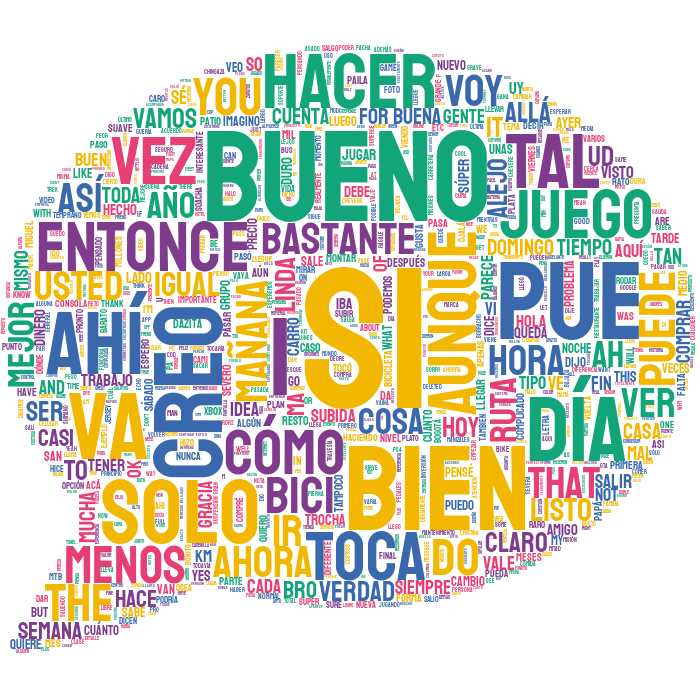

In [14]:
stylecloud.gen_stylecloud(file_path = "both.txt",
                          icon_name = "fas fa-comment",
                          output_name = "both.png",
                          collocations = False,
                          custom_stopwords = words_stop,
                          size = 700)

Image("both.png")

In [15]:
# Extend stopwords

words_stop.extend(["si", "bueno", "bien", "pue"])

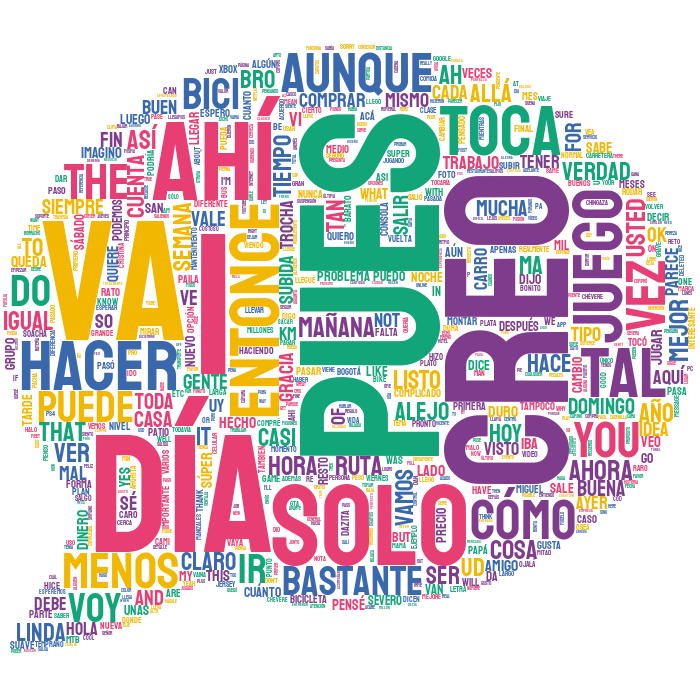

In [16]:
stylecloud.gen_stylecloud(file_path = "both.txt",
                          icon_name = "fas fa-comment",
                          output_name = "both.png",
                          collocations = False,
                          custom_stopwords = words_stop,
                          size = 700)

Image("both.png")

# User 1 Word Cloud

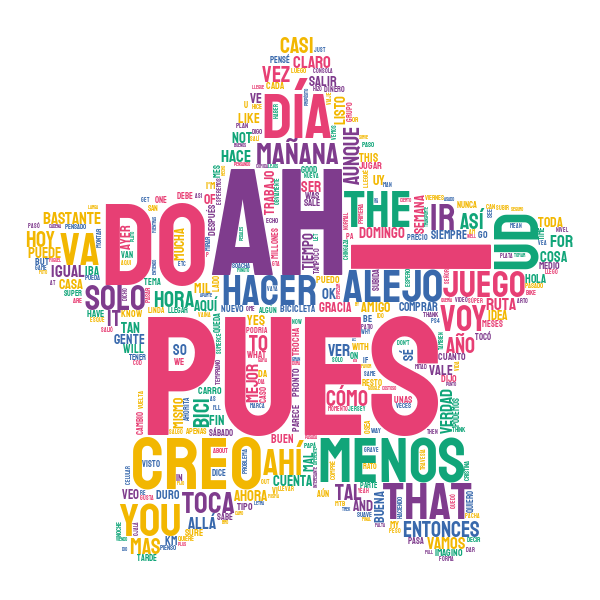

In [17]:
stylecloud.gen_stylecloud(file_path = "u1.txt",
                          icon_name = "fas fa-star",
                          output_name = "u1.png",
                          collocations = False,
                          custom_stopwords = words_stop,
                          size = 600)

Image("u1.png")

# User 2 Word Cloud

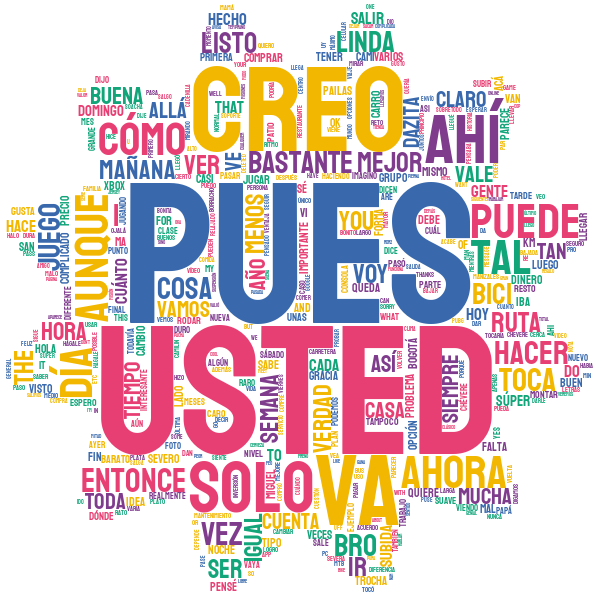

In [18]:
stylecloud.gen_stylecloud(file_path = "u2.txt",
                          icon_name = "fas fa-certificate",
                          output_name = "u2.png",
                          collocations = False,
                          custom_stopwords = words_stop,
                          size = 600)

Image("u2.png")